In [1]:
import sys, pdb
from importlib import reload
from astropy import units as un, constants as cons
from astropy.cosmology import Planck15 as cosmo
import numpy as np
from numpy import log10 as log
sys.path.append('../pysrc/')
import GIZMO_ICs as ics

In [2]:
import warnings
warnings.filterwarnings('ignore')

## steps
* choose grid parameters below
* MakeDisk
    * change parameters (e.g. resolution) in ../MakeDisk_wHalo_m11_lr/main.c
    * compile with make
    * run ./MakeHubbleType ICs/m11_no_halo_#vc#_res#2e4#_fgas#05#.ic
* create output files using script below

### first grid run (July 2021)

In [3]:
vcs = np.array([100,150])*un.km/un.s
Rsonics = np.array([0.3,3,30])*un.kpc
Zs = np.array([0.3,3.])
Rcircs = np.array([1,10])*un.kpc

for vc in vcs[:]:    
    for i,Rsonic in enumerate(Rsonics):
        for base_Z in Zs:
            Z = base_Z*Rsonics[i]/Rsonics[1] # to keep Mdot roughly equal
            base_instance = ics.ICs(vc,Rcircs[0],Rsonic,Z)
            print('v_c=%d, R_sonic=%.1f, Z=%.2f'%(vc.value,Rsonic.value,Z),end=',')
            base_instance.calc_CF_solution(pr=False)
            if base_instance.CF_solution!=None:
                log_nH = log(base_instance.CF_solution.nHs()[base_instance.CF_solution.Rs()>Rcircs[1]][0].value)
                print(' log nH(10 kpc)=%.2f, Mdot=%.3f'%(log_nH,base_instance.CF_solution.Mdot.value))
                for Rcirc in Rcircs[:]:
                    print('R_circ=%d kpc'%Rcirc.value,end=',')
                    instance = ics.ICs(ics=base_instance)
                    instance.Rcirc = Rcirc
                    instance.create_output_files()
            print('')

v_c=100, R_sonic=0.3, Z=0.03, log nH(10 kpc)=-3.09, Mdot=0.535
R_circ=1 kpc, r(t_cool=10Gyr) = 61 kpc, r(t_sc=20Gyr) = 1781 kpc
Part0 num=155722, w/o CGM=25000, |<r>|=1.3 , |<v>|=0.2 , <j>=-0.1 -1.3 189.4,Ms: 8e+04 8e+04 1.6e+05... 8.2e+07
Part2 num=125000, |<r>|=0.0 , |<v>|=0.3 , <j>=0.1 -0.0 656.8,Ms: 8e+04
Part3 num=25000, |<r>|=0.1 , |<v>|=0.7 , <j>=-5.9 -1.6 -0.3,Ms: 8e+04
Part5 num=1, |<r>|=0.0 , |<v>|=0.0 , <j>=0.0 0.0 0.0,Ms: 2e+08
R_circ=10 kpc, r(t_cool=10Gyr) = 61 kpc, r(t_sc=20Gyr) = 1781 kpc
Part0 num=155722, w/o CGM=25000, |<r>|=1.2 , |<v>|=0.2 , <j>=-0.5 -5.1 927.6,Ms: 8e+04 8e+04 1.6e+05... 8.2e+07
Part2 num=125000, |<r>|=0.0 , |<v>|=0.3 , <j>=0.1 -0.0 656.8,Ms: 8e+04
Part3 num=25000, |<r>|=0.1 , |<v>|=0.7 , <j>=-5.9 -1.6 -0.3,Ms: 8e+04
Part5 num=1, |<r>|=0.0 , |<v>|=0.0 , <j>=0.0 0.0 0.0,Ms: 2e+08

v_c=100, R_sonic=0.3, Z=0.30, log nH(10 kpc)=-3.75, Mdot=0.110
R_circ=1 kpc, r(t_cool=10Gyr) = 55 kpc, r(t_sc=20Gyr) = 1730 kpc
Part0 num=55191, w/o CGM=25000, |<r>|=0.8 , |

v_c=150, R_sonic=30.0, Z=30.00,no result reached maximum R, try rerunning with return_all_results=True and check intermediate solutions



### second grid run (Oct 1st 2021)

In [ ]:
vcs = np.array([75,100,150])*un.km/un.s
Rsonics = np.array([100,300])*un.kpc
Zs = np.array([1.,3.])
Rcircs = np.array([10])*un.kpc
for vc in vcs[:]:    
    for Rsonic in Rsonics[:]:
        for Z in Zs[:]:
            base_instance = ics.ICs(vc,Rcircs[0],Rsonic,Z)
            print('v_c=%d, R_sonic=%.1f, Z=%.2f'%(vc.value,Rsonic.value,Z),end=',')
            base_instance.calc_CF_solution(pr=True)
            if base_instance.CF_solution!=None:
                log_nH = log(base_instance.CF_solution.nHs()[base_instance.CF_solution.Rs()>Rcircs[0]][0].value)
                print(' log nH(10 kpc)=%.2f, Mdot=%.3f'%(log_nH,base_instance.CF_solution.Mdot.value))
                for Rcirc in Rcircs[:]:
                    print('R_circ=%d kpc'%Rcirc.value,end=',')
                    instance = ics.ICs(ics=base_instance)
                    instance.Rcirc = Rcirc
                    instance.create_output_files()
            print('')            

#### only the following succeed:
* vc75_Rs100_Mdot4339_Rcirc10
* vc75_Rs300_Mdot19036_Rcirc10
* vc100_Rs100_Mdot7107_Rcirc10
* vc100_Rs300_Mdot27474_Rcirc10
* vc100_Rs100_Mdot15755_Rcirc10
* vc150_Rs100_Mdot31948_Rcirc10

### with and without CGM, with fgas_disk=0.2-0.5. similar to vc150_Rs0_Mdot745_Rcirc10

In [3]:
ics.ICs.R_max=4000*un.kpc
vc = 150*un.km/un.s
Rsonics = np.array([0.3,0.00003])[:]*un.kpc
Z = 0.3
Rcirc = 10*un.kpc
resolution = 2e4*un.Msun #1e3*un.Msun #
instances = [None]*len(Rsonics)
for fgas in (0.2,0.3,0.4,0.5)[:1]:
    for i,Rsonic in enumerate(Rsonics):
        instance = instances[i] = ics.ICs(vc,Rcirc,Rsonic,Z,fgas=fgas,resolution = resolution)
        print('v_c=%d, R_sonic=%.1f, Z=%.2f, f_gas=%.1f'%(vc.value,Rsonic.value,Z,fgas))
        instance.calc_CF_solution(pr=True,tol=1e-8)
        if instance.CF_solution!=None:
            log_nH = log(instance.CF_solution.nHs()[instance.CF_solution.Rs()>Rcirc][0].value)
            print(' log nH(10 kpc)=%.2f, Mdot=%.3f'%(log_nH,instance.CF_solution.Mdot.value))
            instance.create_output_files()
        print('')

v_c=150, R_sonic=0.3, Z=0.30, f_gas=0.2
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=10 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=3 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.125009;  maximum r=30 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.187508;  maximum r=168 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.218758;  maximum r=15 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.203133;  maximum r=153 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.195321;  maximum r=406 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.199227;  maximum r=3525 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.197274;  maximum r=683 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.198250;  maximum r=1157

SystemExit: 1

In [4]:
%tb

SystemExit: 1

In [5]:
pdb.pm()

> /home/jonathan/Dropbox/github_repositories/cooling_flow/pysrc/gsr.py(28)__init__()
-> sys.exit(1)
(Pdb) u
> /home/jonathan/Dropbox/github_repositories/cooling_flow/pysrc/GIZMO_ICs.py(105)create_ICs_hdf5_file()
-> 
(Pdb) p makeDisk_filename
'../MakeDisk_wHalo_m11_lr/ICs/m11_no_halo_150_fgas02.ic'
(Pdb) p self.resolution
<Quantity 1.062882e+10 solMass>
(Pdb) u
> /home/jonathan/Dropbox/github_repositories/cooling_flow/pysrc/GIZMO_ICs.py(100)create_output_files()
-> def create_ICs_hdf5_file(self,fn_out,Rres2Rcool=1):
(Pdb) u
> <ipython-input-3-0f2e737cb3d1>(16)<module>()
-> instance.create_output_files()
(Pdb) u
> /home/jonathan/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py(3325)run_code()
-> exec(code_obj, self.user_global_ns, self.user_ns)
(Pdb) d
> <ipython-input-3-0f2e737cb3d1>(16)<module>()
-> instance.create_output_files()
(Pdb) p resolution
<Quantity 1.062882e+10 solMass>
(Pdb) p instance.resolution
<Quantity 1.062882e+10 solMass>
(Pdb) q


In [30]:
instance.outdirname()

'/home/jonathan/Dropbox/jonathanmain/CGM/KY_sims/ICs/vc150_Rs0_Mdot745_Rcirc10__fgas05'

# plot ICs

In [4]:
import h5py, scipy, scipy.stats, pylab as pl
from astropy import units as un, constants as cons
%matplotlib inline
instance = instances[0]
init_snapshot_fn = instance.outdirname()+'/init_snapshot.hdf5'
init_snapshot = h5py.File(init_snapshot_fn,'r')

In [9]:
# disk only gas
snap = ics.gsr.Snapshot(instance.makedisk_filename())
coords = snap.SnapshotData['pos'][0]
energies = snap.SnapshotData['energies']
inds = (coords[:,1]<25) & (coords[:,1]>-25)
Xs = coords[:,0][inds]
Ys = coords[:,2][inds]
# vals = None #for counting stars
vals = energies[inds] * (un.km**2/un.s**2 * cons.m_p / cons.k_B).to('K').value * (2./3* 0.62) 

In [27]:
# all gas
coords = init_snapshot['PartType0']['Coordinates']
inds = (coords[:,1]<25) & (coords[:,1]>-25)
Xs = coords[:,0][inds]
Ys = coords[:,2][inds]
# vals = None #for counting stars
vals = init_snapshot['PartType0']['InternalEnergy'][inds] * (un.km**2/un.s**2 * cons.m_p / cons.k_B).to('K').value * (2./3* 0.62) 

In [28]:
bins = (np.arange(-25,25,0.25),np.arange(-2.5,2.5,0.025))
m,x,y,_ = scipy.stats.binned_statistic_2d(Xs,
                                         Ys,
                                         log(vals),
                                         statistic='median',
                                         bins=bins)
x = (x[1:]+x[:-1])/2; y = (y[1:]+y[:-1])/2; 

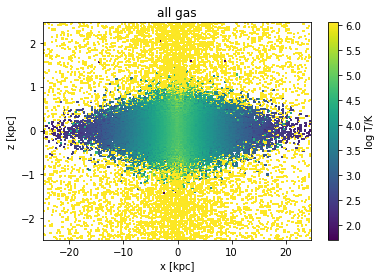

In [29]:
pl.pcolormesh(x,y,m.T)
pl.colorbar(label = 'log T/K')
pl.xlabel('x [kpc]'); pl.ylabel('z [kpc]')
pl.title('all gas')
pl.savefig(KY_path+'../figures/ICs_allgas_temperature.pdf')

In [25]:
bins = (np.arange(-25,25,0.25),np.arange(-2.5,2.5,0.025))
m,x,y,_ = scipy.stats.binned_statistic_2d(Xs,
                                         Ys,
                                         None,
                                         statistic='count',
                                         bins=bins)
x = (x[1:]+x[:-1])/2; y = (y[1:]+y[:-1])/2; 

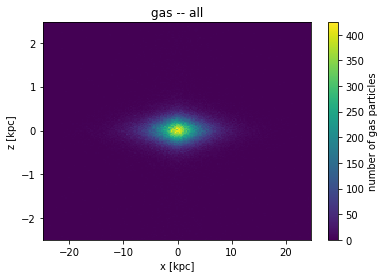

In [26]:
pl.pcolormesh(x,y,m.T)
pl.colorbar(label = 'number of gas particles')
pl.xlabel('x [kpc]'); pl.ylabel('z [kpc]')
pl.title('gas -- disk only')
pl.savefig(KY_path+'../figures/ICs_gas_temperature.pdf')

In [19]:
coords = init_snapshot['PartType2']['Coordinates']
inds = (coords[:,1]<25) & (coords[:,1]>-25)
Xs = coords[:,0][inds]
Ys = coords[:,2][inds]

In [20]:
bins = (np.arange(-25,25,0.25),np.arange(-2.5,2.5,0.025))
m,x,y,_ = scipy.stats.binned_statistic_2d(Xs,
                                         Ys,
                                         None,
                                         statistic='count',
                                         bins=bins)
x = (x[1:]+x[:-1])/2; y = (y[1:]+y[:-1])/2; 

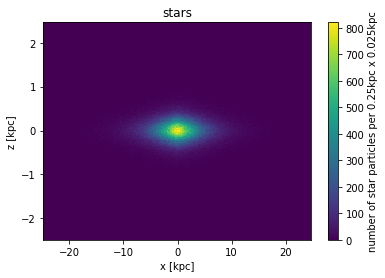

In [22]:
pl.pcolormesh(x,y,m.T)
pl.colorbar(label = 'number of star particles per 0.25kpc x 0.025kpc')
pl.xlabel('x [kpc]'); pl.ylabel('z [kpc]')
pl.title('stars')
pl.savefig(KY_path+'../figures/stellar_locations.pdf')

In [12]:
for i in range(5):
    print(init_snapshot['PartType%d'%i]['Coordinates'].shape)

(250037, 3)
(0, 3)
(500000, 3)
(10000, 3)
(0, 3)


In [ ]:
import FIRE_files as ff
import first_pass as l
logT_projected = l.SnapshotProjection(snapshot, log(snapshot.Ts()),
     edge_on=True,r_max=100,width=100,
    fn='%s_%d_T_edge_on'%(sim,iSnapshot))
res = logT_projected.project()
label = r'temperature $[{\rm K}]$'
cmap = 'RdBu_r'; cbar_range = 1e3,1e6; ticks = [1e3,1e4,1e5,1e6]; ticklabels = [r'$10^3$',r'$10^4$',r'$10^5$',r'$10^6$']
pl.pcolormesh(res[0],res[0],10.**res[2].T,vmin=cbar_range[0],vmax=cbar_range[1],cmap=cmap,
              norm=matplotlib.colors.LogNorm(*cbar_range))



In [ ]:
self = base_instance
ics.Rmax=4000*un.kpc
ics.CF.shoot_from_sonic_point(self.potential,
                                        self.cooling,
                                        self.Rsonic,
                                        self.R_max,self.R_min,max_step=self.max_step,
                                        pr=True,return_all_results=True)

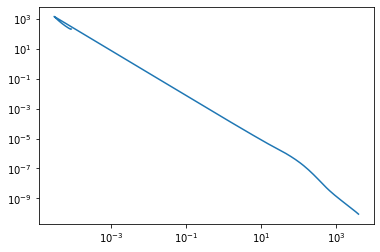

In [6]:
import pylab as pl
pl.loglog(instance.CF_solution.Rs(),instance.CF_solution.nHs())
pl.ion()

### MHD calculation 'MHD_subsonic_no_feedback12'

In [3]:
Rcircs = np.array([1])*un.kpc
Rsonics = np.array([0.1])*un.kpc
vcs = np.array([200])*un.km/un.s
Zs = np.array([1])
smallGalaxy = True
resolution = 2e4
#for constant Rsonic, Rcool scales as v_c^{2/3} Z^0
ics.ICs.R_min = 0.03*un.kpc
for vc in vcs[:]:    
    for Rsonic in Rsonics[:]:
        for Z in Zs[:]:
            base_instance = ics.ICs(vc,Rcircs[0],Rsonic,Z,smallGalaxy=smallGalaxy,resolution=resolution)
            print('v_c=%d, R_sonic=%.1f, Z=%.2f'%(vc.value,Rsonic.value,Z),end=',')
            base_instance.calc_CF_solution(pr=False)
            if base_instance.CF_solution!=None:
                log_nH = log(base_instance.CF_solution.nHs()[base_instance.CF_solution.Rs()>Rcircs[0]][0].value)
                print(' log nH(Rcirc)=%.2f, Mdot=%.3f'%(log_nH,base_instance.CF_solution.Mdot.value))
                for Rcirc in Rcircs[:]:
                    print('R_circ=%d kpc'%Rcirc.value,end=',')
                    instance = ics.ICs(ics=base_instance)
                    instance.Rcirc = Rcirc
                    instance.create_output_files(Rres2Rcool=2)
            print('')            

v_c=200, R_sonic=0.1, Z=1.00, log nH(Rcirc)=-1.79, Mdot=0.346
R_circ=1 kpc, 2r(t_cool=10Gyr) = 119 kpc, r(t_sc=20Gyr) = 3160 kpc
Part0 num=533280, w/o CGM=1000, |<r>|=0.3, |<v>|=0.0, <j>=-0.0 0.0 199.7,Ms: 2e+04 2e+04 6e+04... 1.2e+09
Part2 num=5000, |<r>|=0.0, |<v>|=3.2, <j>=-0.0 -0.1 101.9,Ms: 2e+04
Part3 num=1000, |<r>|=0.1, |<v>|=2.2, <j>=-3.5 7.0 11.7,Ms: 2e+04
Part5 num=1, |<r>|=0.0, |<v>|=0.0, <j>=0.0 0.0 0.0,Ms: 2e+06



In [4]:
Rcirc = Rcirc
(4*np.pi*Rcirc**3 / 3. * 10**log_nH *un.cm**-3 * cons.m_p).to('Msun') / (resolution*un.Msun)

<Quantity 84.54576202>

### for Nadav's cooling flow calculations

In [85]:
fiducial = ics.ICs(vc=200*un.km/un.s,
                   Rcirc=10*un.kpc,
                    Rsonic=0.2*un.kpc,
                    Z_CGM=0.1)
fiducial.resolution = 1e4

In [86]:
fiducial.calc_CF_solution(pr=True)
ind = (fiducial.CF_solution.Rs()>10*un.kpc).nonzero()[0][0]
log_nH = log(fiducial.CF_solution.nHs()[ind].value)
print('log nH(10 kpc)=%.2f, Mdot=%.3f'%(log_nH,fiducial.CF_solution.Mdot.value))

Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=4 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=2 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.125009;  maximum r=21 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.187508;  maximum r=156 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.156258;  maximum r=57 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.171883;  maximum r=170 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.179696;  maximum r=839 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.183602;  maximum r=725 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.181649;  maximum r=8814 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.182625;  maximum r=1606 kpc; stop reason: sonic point
Integrated wit

In [87]:
fiducial.CF_solution.tcool_to_tff()[ind].to(''), fiducial.CF_solution.Ts()[ind], fiducial.CF_solution.Ms()[ind]

(<Quantity 6.20716036>, <Quantity 1985568.07524863 K>, <Quantity 0.10851114>)

In [88]:
((fiducial.CF_solution.Mdot * fiducial.CF_solution.t_cools()[ind])/(fiducial.resolution*un.Msun)).to('')

<Quantity 216676.32263177>

In [89]:
_/30/10

<Quantity 722.25440877>

In [93]:
6/2.5 * 24 / 100

0.576

In [90]:
fiducial.create_output_files()

83.4510860252541 kpc 3247.678634006795 kpc
PartType0 number without halo gas pos 200000
PartType0 pos (9466546, 3)
mean position: -0.12 0.25 0.16
PartType0 vel (9466546, 3)
mean velocity: -0.01 -0.01 0.00
angular momentum: -0.96 -1.10 1953.60
PartType0 mass (9466546,)
possible masses: 10000.0000 10000.0004 20000.0014 40000.0238 80000.0936 160000.0933 320000.0645 640000.5006 1280001.1478 2560004.9129 5120021.6251 10240029.7457 20480279.8807
PartType0 energies (9466546,)

PartType1 pos (0, 3)
mean position: nan nan nan
PartType1 vel (0, 3)
mean velocity: nan nan nan
angular momentum: nan nan nan
PartType1 mass (0,)
possible masses: 

PartType2 pos (1000000, 3)
mean position: -0.00 -0.01 -0.00
PartType2 vel (1000000, 3)
mean velocity: 0.17 0.03 0.03
angular momentum: 0.05 -0.02 1085.07
PartType2 mass (1000000,)
possible masses: 10000.0000

PartType3 pos (200000, 3)
mean position: -0.02 0.03 0.03
PartType3 vel (200000, 3)
mean velocity: -0.32 -0.06 0.06
angular momentum: 1.87 3.67 1.34
Par

In [96]:
((2e-3*un.cm**-3 *cons.m_p / 0.7 * 4*np.pi/3*(20**3-10**3)*un.kpc**3) / (1e4*un.Msun)).to('')

<Quantity 207036.9174994>